# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Monte Carlo Simulation and Efficient Frontier

</font>
</div>

# Action plan
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Introduction to Monte Carlo Simulation
- Applying Monte Carlo Simulation on portfolios using Sharpe Ratio
- Creating Efficient Frontier based on Sharpe Ratio

</font>
</div>

# Monte Carlo
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- It can be used to simulate risk and uncertainty that can affect the outcome of different decision options.

- If there are **too many** variables affecting the outcome, then it can simulate them and find the optimal based on the values.

- MCS are used to model the probability of different outcomes in a process that cannot easily be predicted **due to** the intervention of random variables. 
    
- It is a technique used to understand **the impact of** risk and uncertainty in prediction and forecasting models.

</font>
</div>



# Imports
<hr style = "border:2px solid black" ></hr>

In [57]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Load data
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Let's pull some data time series of historic stock prices from YAHOO.
- This can be easily done with Pandas Datareader.
- This will read historic stock prices from Apple (`AAPL`) starting from 2020 and up until today. 

</font>
</div>

In [48]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [49]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TWTR         IBM       AAPL   
Date                                                                  
2020-01-02  73.683571  156.592026  32.299999  112.916939  75.087502   
2020-01-03  72.967216  154.642166  31.520000  112.016396  74.357498   
2020-01-06  73.548630  155.041870  31.639999  111.816307  74.949997   
2020-01-07  73.202728  153.628235  32.540001  111.891312  74.597504   
2020-01-08  74.380287  156.075302  33.049999  112.825218  75.797501   

Attributes                                          High              ...  \
Symbols           MSFT       TWTR         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2020-01-02  160.619995  32.299999  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  128.288712  75.224998  159.669998  ...   
2020-01-08  160.089996  33.049999  129.359467  76.110001  160.800003  ...   

Attributes        Low                   Open                         \
Symbols          TWTR         IBM       AAPL        MSFT       TWTR   
Date                                                                  
2020-01-02  31.959999  128.843216  74.059998  158.779999  32.310001   
2020-01-03  31.260000  127.686424  74.287498  158.320007  31.709999   
2020-01-06  31.160000  127.342255  73.447502  157.080002  31.230000   
2020-01-07  31.719999  127.533463  74.959999  159.320007  31.799999   
2020-01-08  32.349998  128.030594  74.290001  158.929993  32.349998   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2020-01-02  129.063095  135480400.0  22622100.0  10721100.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  14429500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  12582500.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  13712900.0  3232977.0  
2020-01-08  128.594650  132079200.0  27746500.0  14632400.0  4545916.0  

[5 rows x 24 columns]

In [42]:
data = data['Adj Close']

In [46]:
data.head()

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,73.683571,156.592010,32.299999,112.916931
2020-01-03,72.967209,154.642166,31.520000,112.016411
2020-01-06,73.548637,155.041870,31.639999,111.816284
2020-01-07,73.202728,153.628235,32.540001,111.891327
2020-01-08,74.380287,156.075302,33.049999,112.825218


In [44]:
data.shape

(668, 4)

# Sharpe Ratio
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- The Sharpe Ratio combines Risk and Return in one number.

- The Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. 
    
- **Volatility** is a measure of the price fluctuations of an asset or portfolio (source).

</font>
</div>

In [27]:
# To use it with Sharpe Ratio, we will calculate the log returns.
log_returns = np.log(data/data.shift())

In [28]:
log_returns

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.024445,-0.008007
2020-01-06,0.007937,0.002581,0.003800,-0.001788
2020-01-07,-0.004714,-0.009160,0.028048,0.000671
2020-01-08,0.015958,0.015803,0.015551,0.008312
...,...,...,...,...
2022-08-19,-0.015217,-0.013951,0.002960,-0.005046
2022-08-22,-0.023299,-0.029795,-0.022530,-0.020591
2022-08-23,-0.002031,-0.004728,-0.076059,-0.005994


In [29]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.39527845, 0.1587139 , 0.26102803, 0.18497963])

In [30]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [31]:
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [32]:
sharpe_ratio = exp_rtn / exp_vol

In [33]:
sharpe_ratio

0.6081182724733512

# Monte Carlo Simulation
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- The code will run 5000 experiments. 
- We will keep all the data from each run: 
    - The weights of the portfolios (weights)
    - The expected return (exp_rtns)
    - The expected volatility (exp_vols)
    - The Sharpe Ratio (sharpe_ratios)

</font>
</div>

In [51]:
n = 5000

weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight

    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(
        np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

# Post-processing
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- We now want to know the maximum Sharpe Ratio is.
- Once that is know we'd like to know the weights corresponding to this.
- The weights are telling you the percentage of stocks you corresponding to the best Sharpe Ratio. 
- For instance a portfoili could hold 45.7% to AAPL, 6.7% to MSFT, 47.5% to TWTR, and 0,03% to IBM is optimal.
- **Pay attention** that due to the random component, everytime you ran the MCS, you will get some slightly different values.

</font>
</div>

In [52]:
sharpe_ratios.max()

0.8302427819999504

In [54]:
sharpe_ratios.argmax()

3607

In [55]:
weights[sharpe_ratios.argmax()]

array([0.77679166, 0.11958423, 0.00666932, 0.0969548 ])

# Efficient Frontier
<hr style = "border:2px solid black" ></hr>

<IPython.core.display.Javascript object>


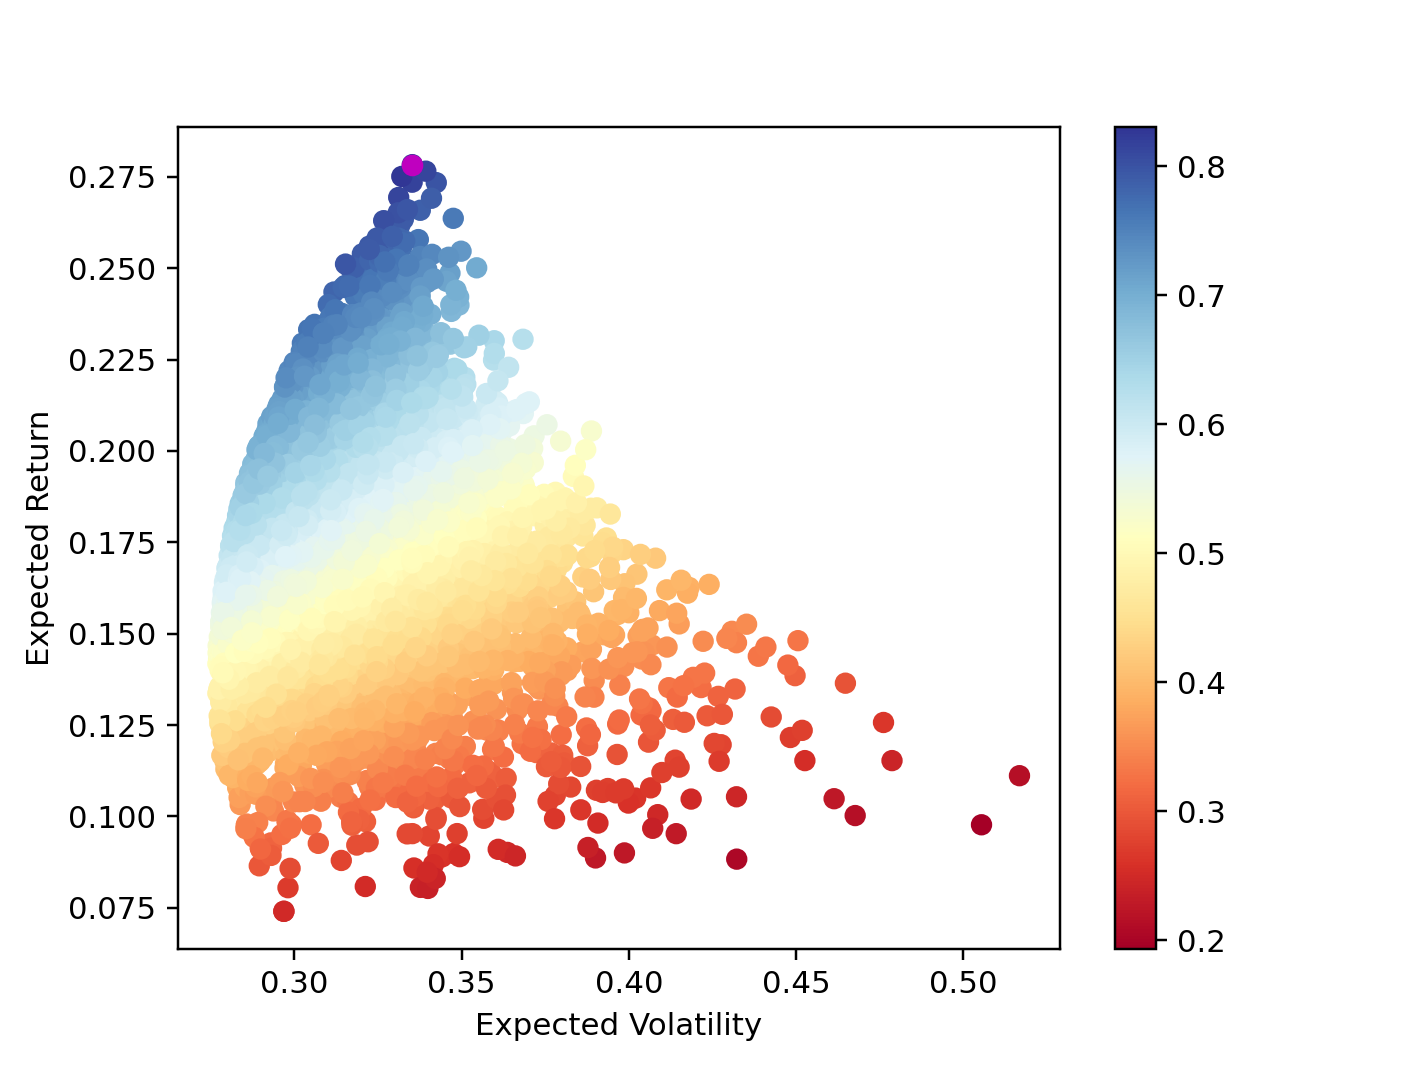

In [75]:
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')

sc = plt.scatter(exp_vols, exp_rtns, c=sharpe_ratios, s=35, cmap=cm)

ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='m')

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

plt.colorbar(sc)
plt.show()

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- [Monte Carlo Simulation Wikipedia article](https://en.wikipedia.org/wiki/Monte_Carlo_method)
- [Source code on Github](https://github.com/LearnPythonWithRune/PythonForFinanceRiskAndReturn/blob/main/04%20-%20Monte%20Carlo%20Simulation%20and%20Efficient%20Frontier.ipynb)
- [Blog article](https://www.learnpythonwithrune.org/monte-carlo-simulation-to-optimize-a-portfolio-using-pandas-and-numpy/)

</font>
</div>